# Credit Card Churn Prediction

### Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
plt.style.use('classic')
sns.set()


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

## Loading The Data

In [2]:
df = pd.read_csv('../input/credit-card-customers/BankChurners.csv')

In [3]:
print(df.shape)
pd.set_option('display.max_columns', 23)
df.head(5)

(10127, 23)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
df.isnull().sum().sum()

0

## Exploratory Data Analysis

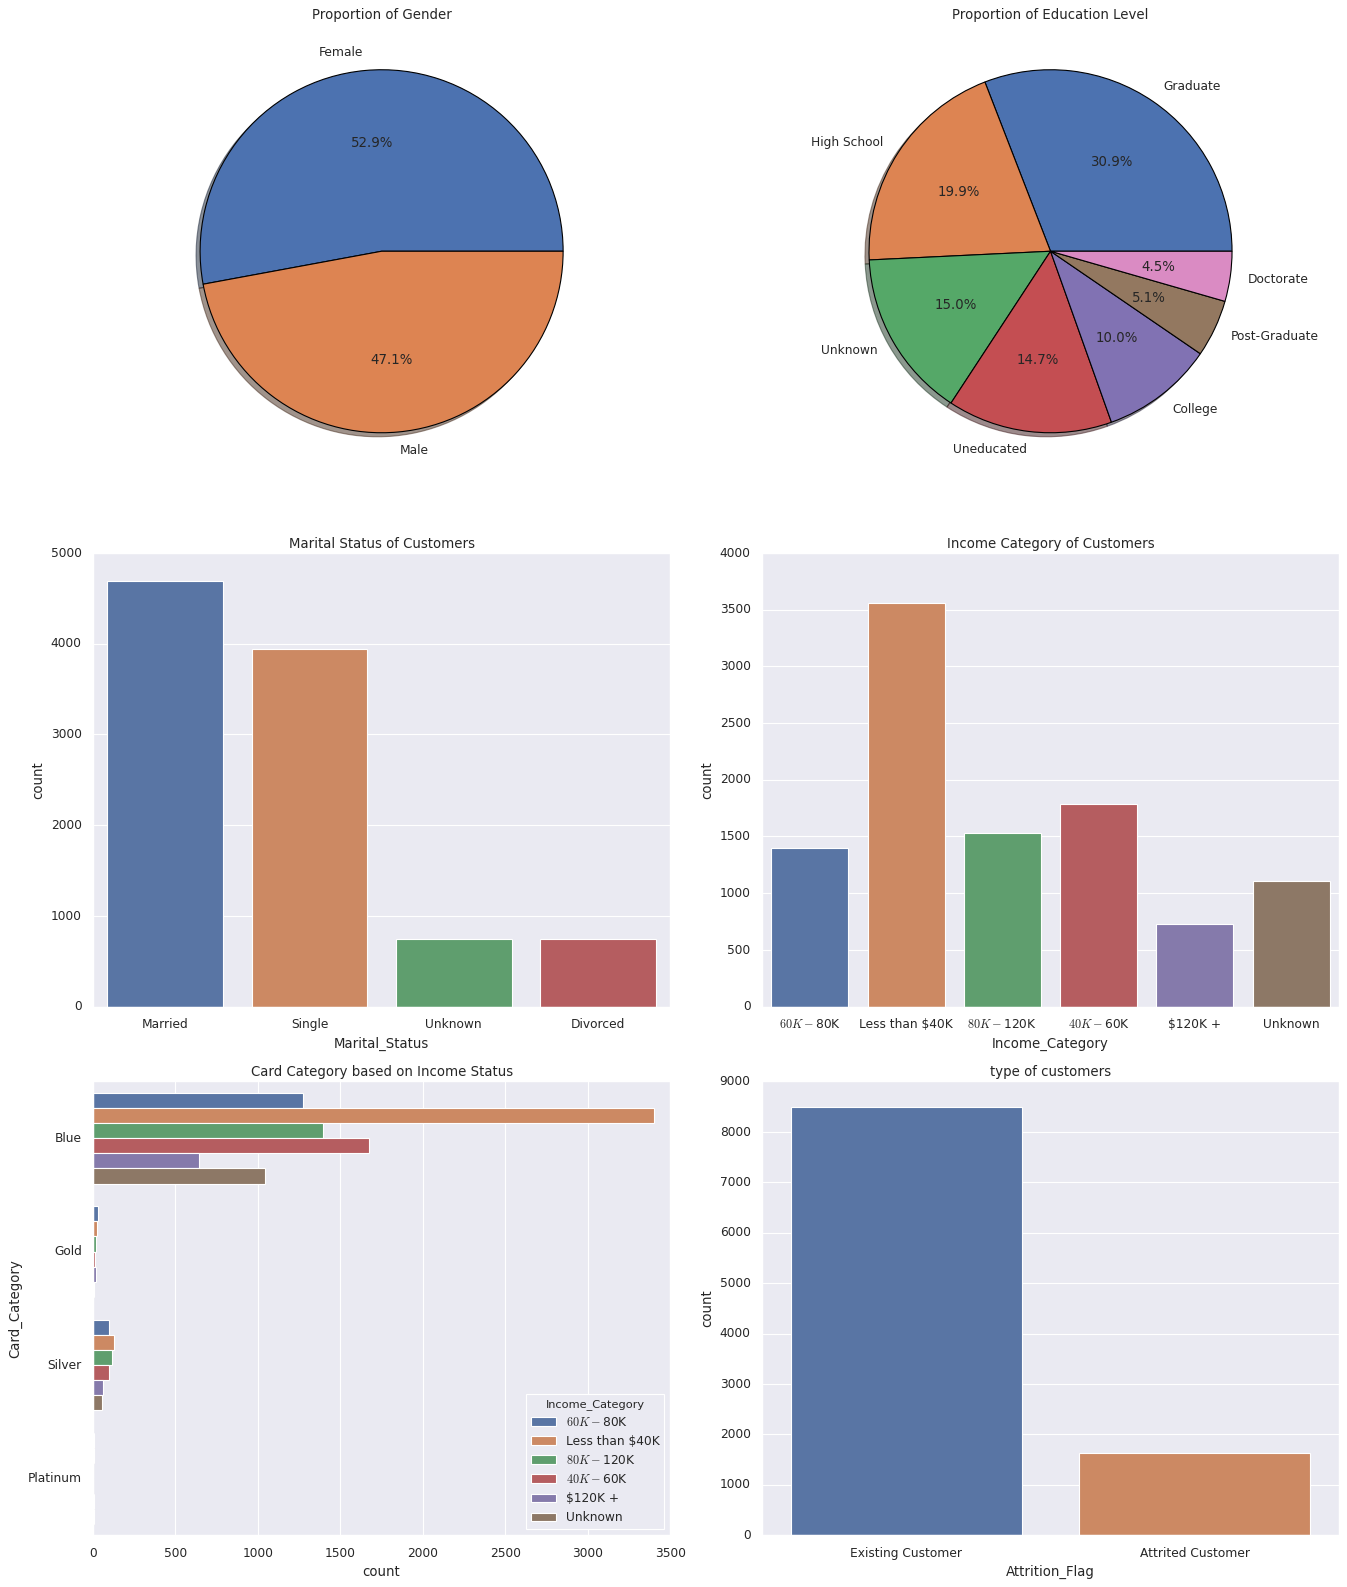

In [5]:

fig = plt.figure(constrained_layout=False, figsize=(17, 20))
spec = gridspec.GridSpec(ncols=2, nrows=3, figure=fig)
ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[0, 1])
ax3 = fig.add_subplot(spec[1, 0])
ax4 = fig.add_subplot(spec[1, 1])
ax5 = fig.add_subplot(spec[2, 0])
ax6 = fig.add_subplot(spec[2, 1])

labels = ['Female', 'Male']
ax1.pie(df['Gender'].value_counts(),labels = labels,  autopct='%.1f%%',
        shadow=True, wedgeprops={'edgecolor': 'black'})
ax1.set_title('Proportion of Gender')

labels = df.Education_Level.value_counts().keys().tolist()
ax2.pie(df['Education_Level'].value_counts(), autopct='%.1f%%', labels=labels, 
       shadow=True, wedgeprops={'edgecolor':'black'})
ax2.set_title('Proportion of Education Level')


sns.countplot(ax=ax3, x=df['Marital_Status'])
ax3.set_title('Marital Status of Customers')

sns.countplot(ax=ax4, x=df['Income_Category'])
ax4.set_title('Income Category of Customers')


sns.countplot(y='Card_Category', data=df, hue='Income_Category', ax=ax5).set_title('Card Category based on Income Status')

sns.countplot(x='Attrition_Flag', data=df, ax=ax6).set_title('type of customers')

plt.tight_layout()
plt.show()

Text(0.5, 0, 'Customer Age')

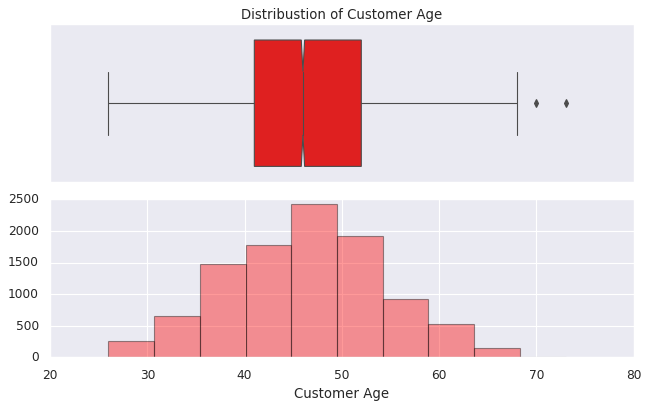

In [6]:
fig = plt.figure(figsize=(8, 5), constrained_layout=True)
spec = gridspec.GridSpec(nrows=2, ncols=1, figure=fig)
ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[1, 0])

sns.boxplot(x='Customer_Age', data=df, color='red',notch=True, linewidth=1, ax=ax1).set(title='Distribustion of Customer Age', 
                                                               xticks=[], xlabel='')

ax2.hist(df['Customer_Age'], color='red', alpha=0.4, edgecolor='black')
ax2.set_xlabel('Customer Age')


Text(0.5, 0, 'Credit Limit')

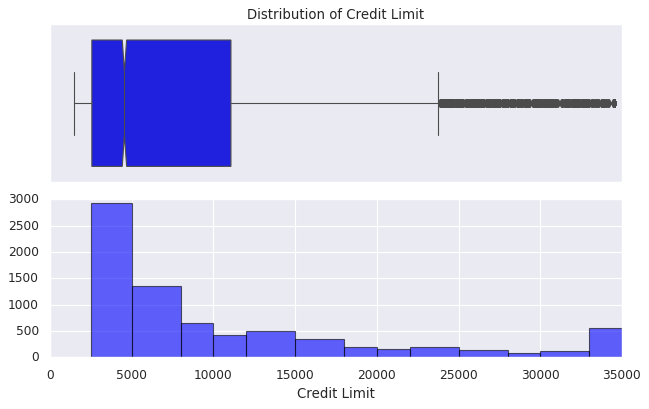

In [7]:
fig = plt.figure(figsize=(8, 5), constrained_layout=True)
spec = gridspec.GridSpec(ncols=1, nrows=2, figure=fig)
ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[1, 0])

sns.boxplot(x='Credit_Limit', data=df, color='blue',notch=True, linewidth=1, ax=ax1).set(title='Distribution of Credit Limit', 
                                                           xlabel='', xticks=[])
bins=[2500, 5000, 8000, 10000, 12000, 15000, 18000, 20000, 22000, 25000, 28000, 30000,33000,  35000 ]
ax2.hist(df['Credit_Limit'], bins=bins, color='blue', alpha=0.6, edgecolor='black')
ax2.set_xlabel('Credit Limit')

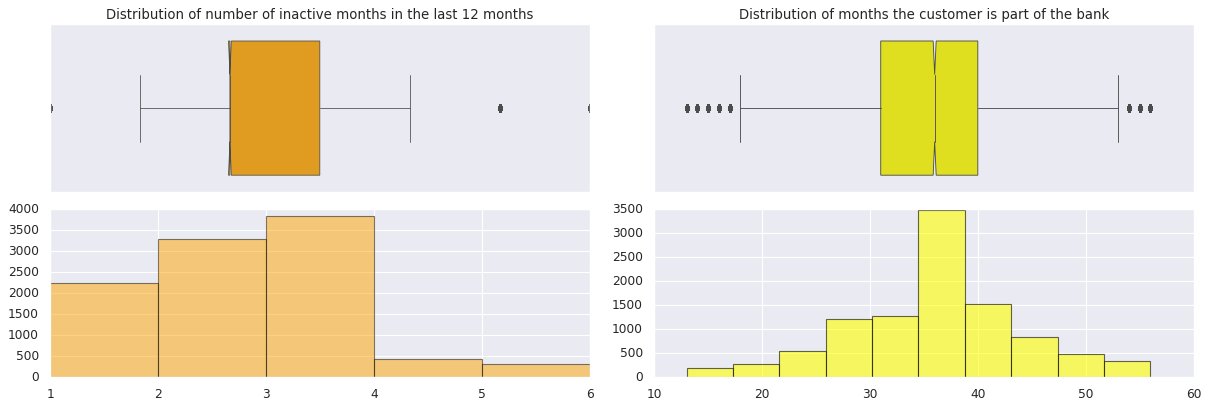

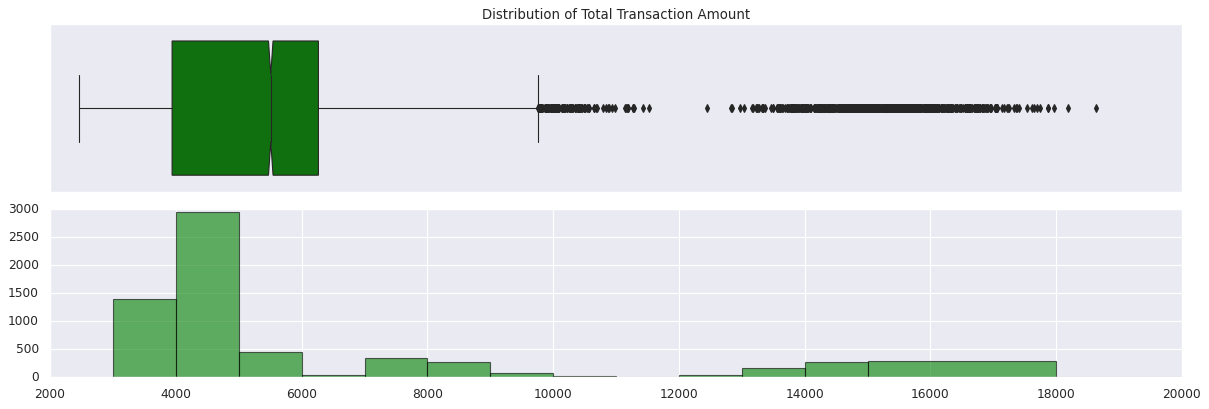

In [8]:
fig = plt.figure(figsize=(15, 5), constrained_layout=True)
spec = gridspec.GridSpec(nrows=2, ncols=2, figure=fig)

ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[0, 1])
ax3 = fig.add_subplot(spec[1, 0])
ax4 = fig.add_subplot(spec[1, 1])

sns.boxplot(x='Months_Inactive_12_mon', data=df, color='orange',notch=True,linewidth=0.7, ax=ax1).set(title='Distribution of number of inactive months in the last 12 months', 
                                                                            xlabel='', xticks=[])
bins=[1, 2, 3, 4, 5, 6]
ax3.hist(df['Months_Inactive_12_mon'],bins=bins, color='orange', alpha=0.5, edgecolor='black')

sns.boxplot(x='Months_on_book', data=df, color='yellow',notch=True,linewidth=0.8, ax=ax2).set(title='Distribution of months the customer is part of the bank', 
                                                                   xlabel='', xticks=[])
ax4.hist(df['Months_on_book'], color='yellow', alpha=0.6, edgecolor='black')
plt.show()

fig2 = plt.figure(figsize=(15,5), constrained_layout=True)
spec2 = gridspec.GridSpec(nrows=2, ncols=1, figure=fig2)

ax5 = fig2.add_subplot(spec2[0, 0])
ax6 = fig2.add_subplot(spec2[1, 0])

sns.boxplot(x='Total_Trans_Amt', data=df, color='green', notch=True, linewidth=1, ax=ax5).set(title='Distribution of Total Transaction Amount', 
                                                                                             xlabel='', xticks=[])
bins=[3000,4000, 5000,6000, 7000, 8000,9000, 10000,11000, 12000,13000,14000, 15000, 18000, 20000 ]
ax6.hist(df['Total_Trans_Amt'],bins=bins, color='green', alpha=0.6, edgecolor='black')
plt.show()

## Data Preprocessing

In [9]:
df['Attrition_Flag'].replace({'Existing Customer': 0, 
                            'Attrited Customer': 1}, inplace=True)

df['Gender'].replace({'M': 0, 'F':1}, inplace=True)

df.replace({'Unknown': np.nan}, inplace=True)
df['Card_Category'].replace({'Platinum': np.nan})

df.dropna(inplace=True)
df = df.iloc[:, :-2]

In [10]:

df2 = pd.concat([df.drop(['CLIENTNUM','Education_Level', 
                          'Marital_Status', 'Income_Category', 'Card_Category', 
                         'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1'], axis=1), 
                pd.get_dummies(df['Education_Level']), 
                pd.get_dummies(df['Marital_Status']), 
                pd.get_dummies(df['Income_Category']), 
                pd.get_dummies(df['Card_Category'])], axis=1)
df2.reset_index(drop=True, inplace=True)

In [11]:
df2.sample(5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Married,Single,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Blue,Gold,Platinum,Silver
1699,0,34,0,0,17,4,1,4,2638.0,2092,546.0,...,1,0,0,1,0,0,0,1,0,0,0
4565,0,47,0,1,41,5,3,3,9036.0,1080,7956.0,...,1,0,1,0,0,0,0,1,0,0,0
3804,0,38,0,2,36,3,3,3,6452.0,1151,5301.0,...,1,0,0,0,0,1,0,1,0,0,0
5930,1,49,1,4,42,2,4,3,2575.0,2517,58.0,...,1,0,0,0,0,0,1,1,0,0,0
1026,0,55,1,0,36,6,2,4,3615.0,1699,1916.0,...,1,0,0,0,0,0,1,1,0,0,0


In [12]:
df2.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Avg_Utilization_Ratio', 'College', 'Doctorate', 'Graduate',
       'High School', 'Post-Graduate', 'Uneducated', 'Divorced', 'Married',
       'Single', '$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K',
       'Less than $40K', 'Blue', 'Gold', 'Platinum', 'Silver'],
      dtype='object')

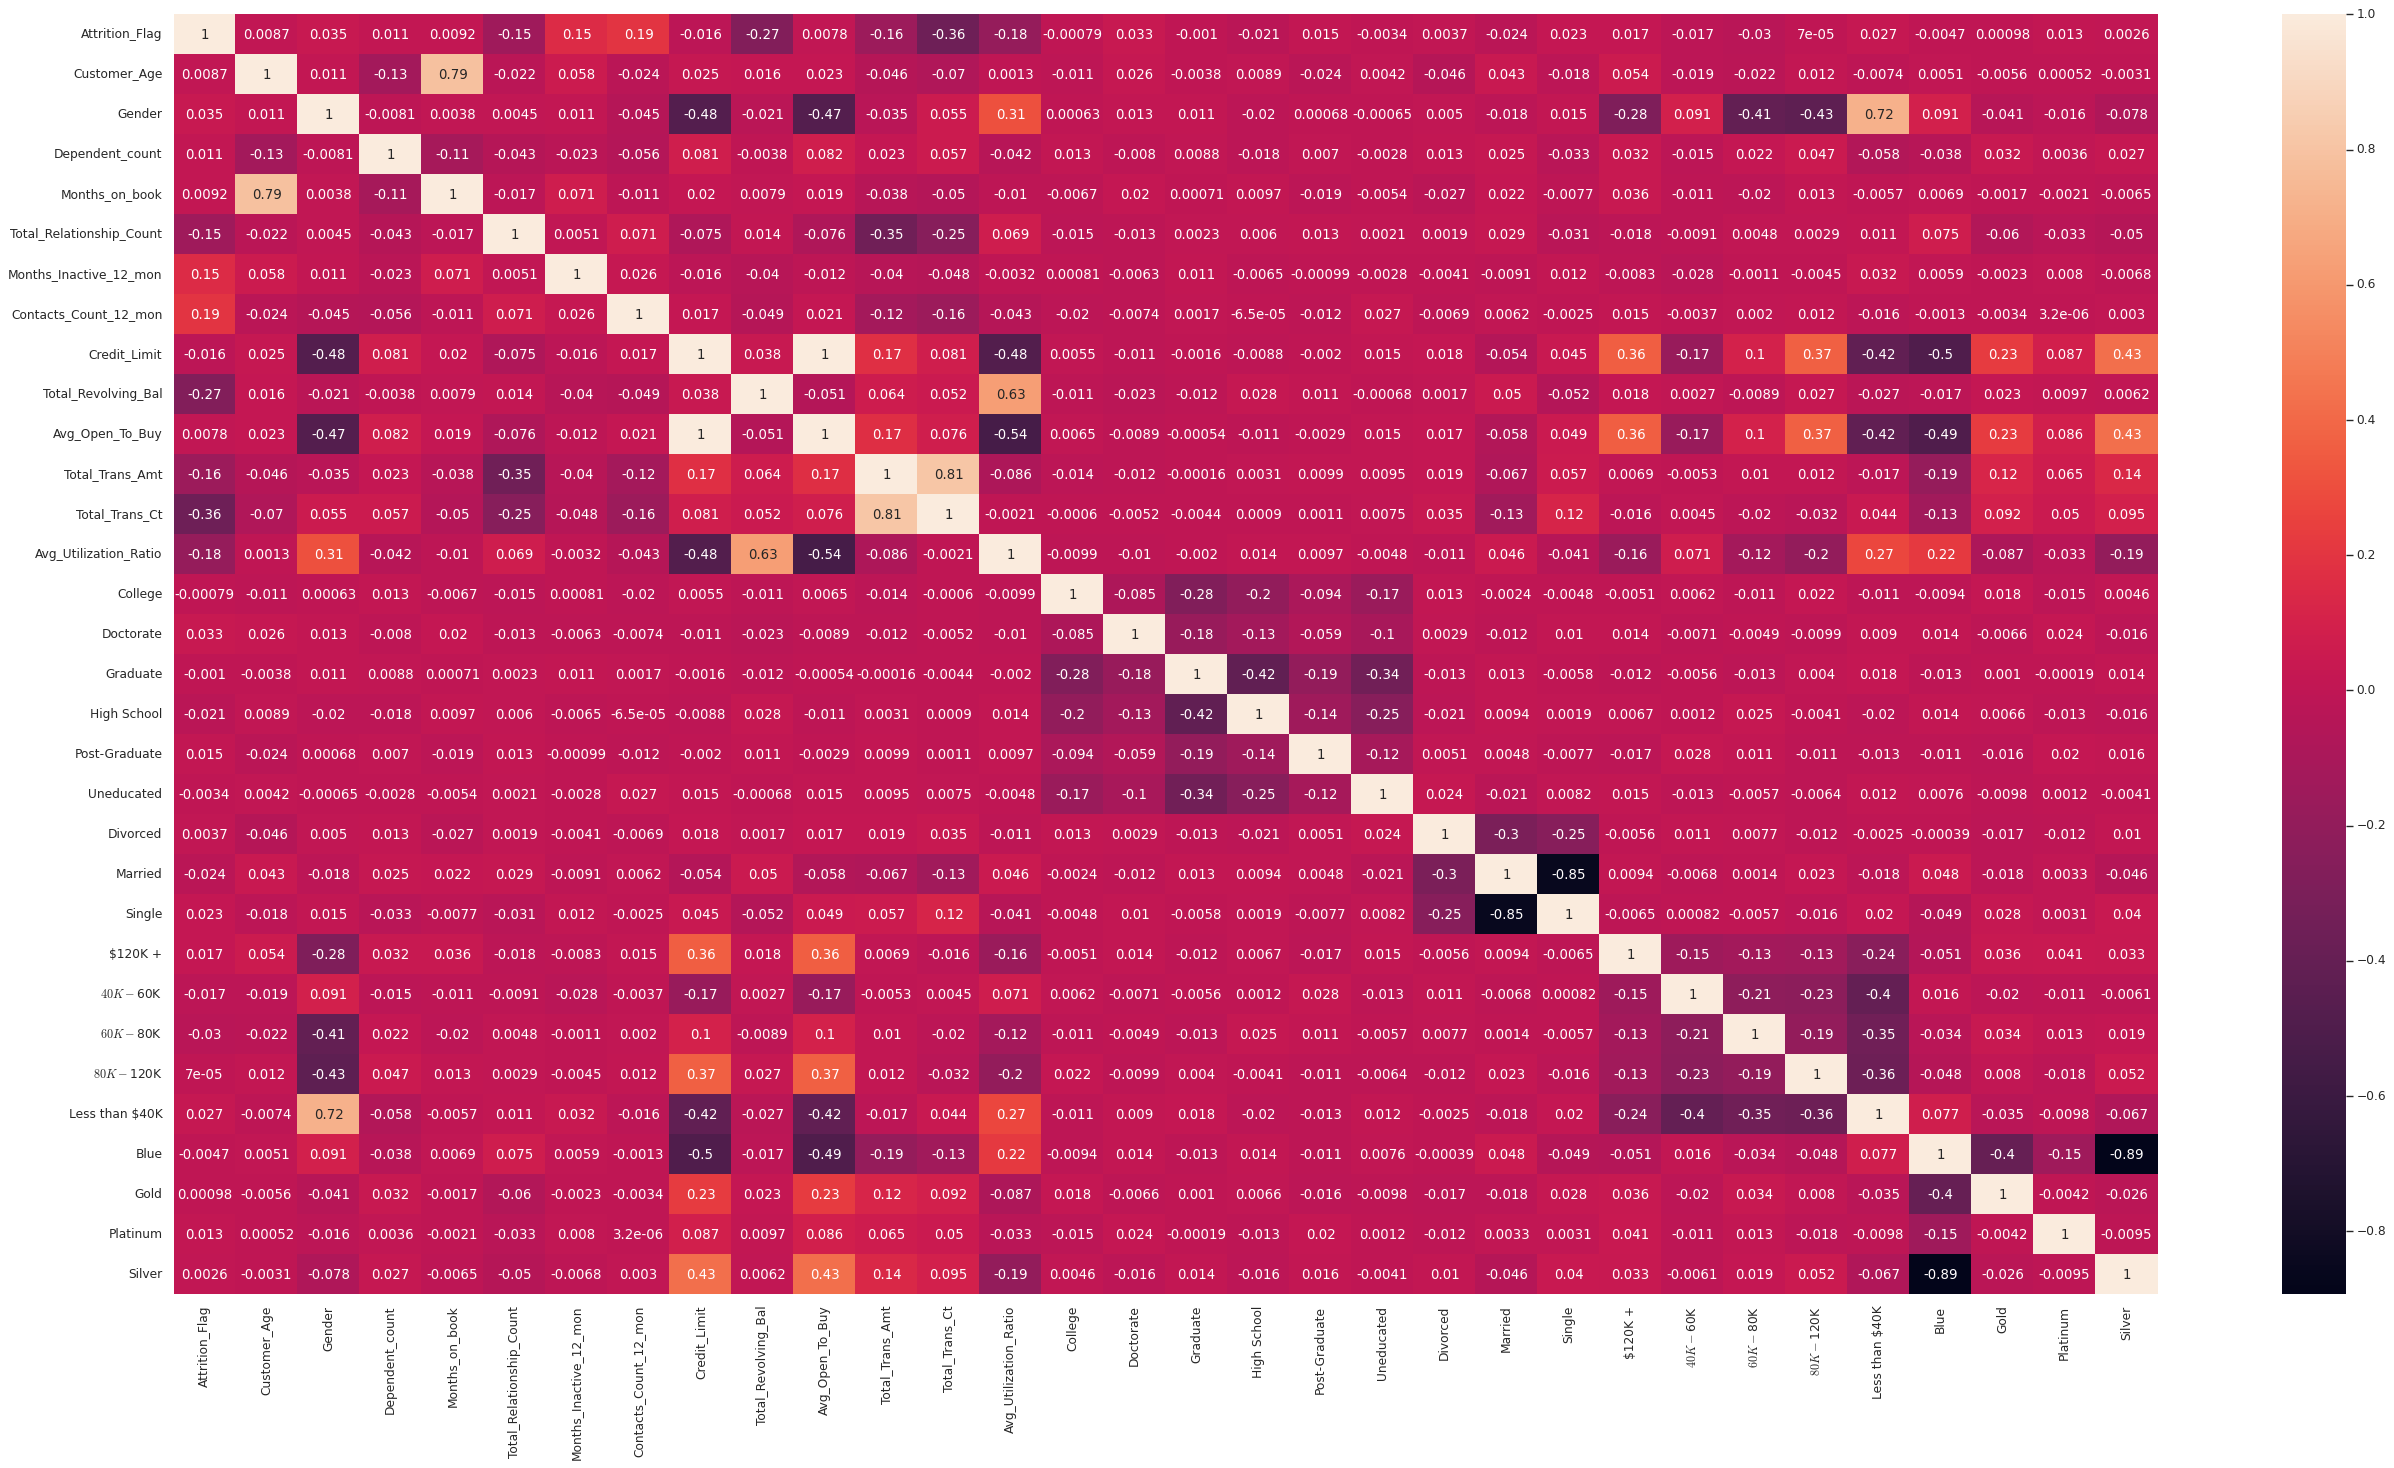

In [13]:
plt.figure(figsize=(40, 20))
sns.heatmap(df2.corr('pearson'), annot=True)

## Modeling

In [14]:
x = df2.drop(['Attrition_Flag'], axis=1)
y = df2['Attrition_Flag']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Logistic Regression

In [15]:
log = LogisticRegression(C=500, max_iter=50000)
log.fit(x_train, y_train)
yhat1 = log.predict(x_test)
print('Logistic Regression :\n\n\t', f'The Training model accuracy :{log.score(x_train, y_train)}\n\t',
     f'The Test model accuracy: {log.score(x_test, y_test)}')
print(classification_report(y_test, yhat1))

Logistic Regression :

	 The Training model accuracy :0.8915960451977402
	 The Test model accuracy: 0.8828510938602682
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1211
           1       0.65      0.43      0.51       206

    accuracy                           0.88      1417
   macro avg       0.78      0.69      0.72      1417
weighted avg       0.87      0.88      0.87      1417



### Decision Tree Classifier

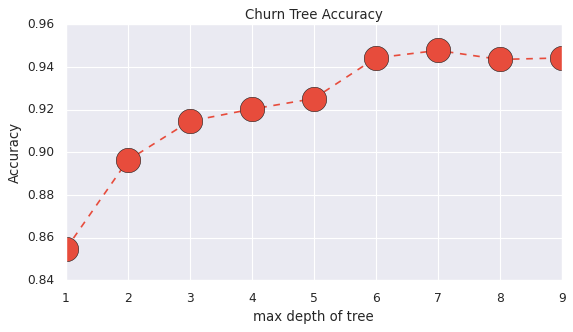

In [16]:
s = []
for i in range(1, 10):
    churn_tree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    churn_tree.fit(x_train, y_train)
    s.append(churn_tree.score(x_test, y_test))
    
x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
fig = plt.figure(figsize=(8, 4))
plt.plot(x, s, '--o', markersize=22, color='#e74c3c')
plt.xlabel('max depth of tree')
plt.ylabel('Accuracy')
plt.xticks(x)
plt.title('Churn Tree Accuracy')
plt.show()

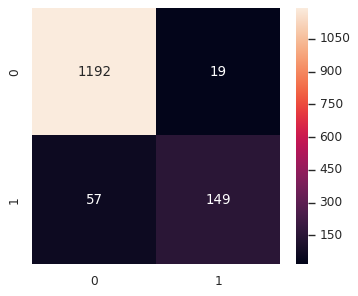

Decision Tree Classifier :

	 The Training model accuracy :0.9544491525423728
	 The Test model accuracy: 0.9463655610444601
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1211
           1       0.89      0.72      0.80       206

    accuracy                           0.95      1417
   macro avg       0.92      0.85      0.88      1417
weighted avg       0.94      0.95      0.94      1417



In [17]:
churn_tree = DecisionTreeClassifier(criterion='entropy', max_depth=7)
churn_tree.fit(x_train, y_train)
yhat2 = churn_tree.predict(x_test)
cf_mat = confusion_matrix(y_test, yhat2)
plt.figure(figsize=(5, 4))
sns.heatmap(cf_mat, annot=True, fmt='g')
plt.show()


print('Decision Tree Classifier :\n\n\t', f'The Training model accuracy :{churn_tree.score(x_train, y_train)}\n\t',
     f'The Test model accuracy: {churn_tree.score(x_test, y_test)}')
print(classification_report(y_test, yhat2))

### Random Forest Classifier

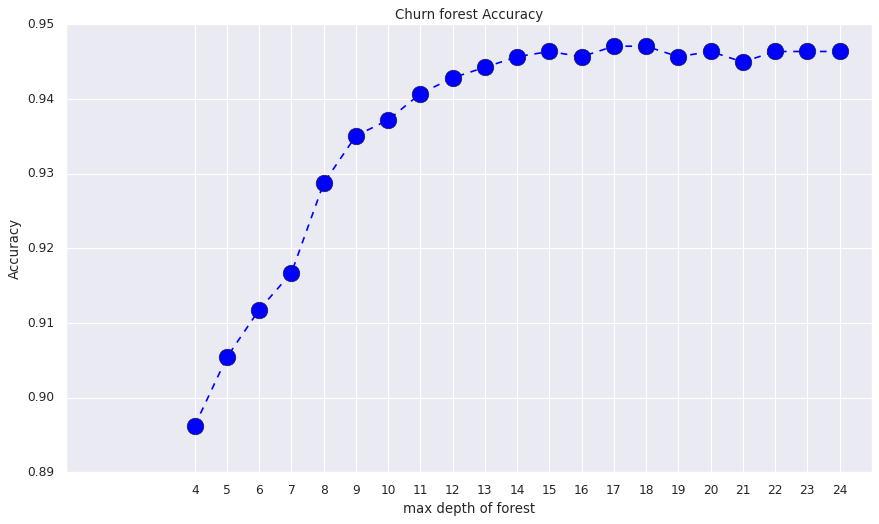

In [18]:
s = []
for i in range(4, 25):
    churn_forest = RandomForestClassifier(criterion='gini', n_estimators=700, max_depth=i, random_state=42)
    churn_forest.fit(x_train, y_train)
    s.append(churn_forest.score(x_test, y_test))

x = np.arange(4, 25)
plt.figure(figsize=(13, 7))
plt.plot(x, s, '--o', markersize=15, color='blue')
plt.xlabel('max depth of forest')
plt.ylabel('Accuracy')
plt.xticks(x)
plt.title('Churn forest Accuracy')
plt.show()

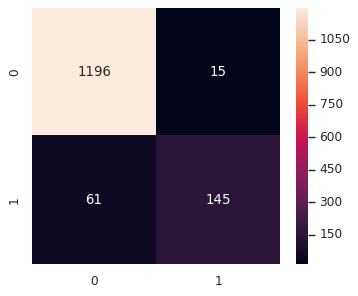

Random Forest Classifier :

	 The Training model accuracy :1.0
	 The Test model accuracy: 0.9463655610444601
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1211
           1       0.91      0.70      0.79       206

    accuracy                           0.95      1417
   macro avg       0.93      0.85      0.88      1417
weighted avg       0.94      0.95      0.94      1417



In [19]:
churn_forest = RandomForestClassifier(criterion='gini', n_estimators=700, max_depth=20, random_state=42)
churn_forest.fit(x_train, y_train)
yhat3 = churn_forest.predict(x_test)
plt.figure(figsize=(5, 4))
cf_mat = confusion_matrix(y_test, yhat3)
sns.heatmap(cf_mat, annot=True, fmt='g')
plt.show()


print('Random Forest Classifier :\n\n\t', f'The Training model accuracy :{churn_forest.score(x_train, y_train)}\n\t',
     f'The Test model accuracy: {churn_forest.score(x_test, y_test)}')
print(classification_report(y_test, yhat3))

### XGBoost Classifier

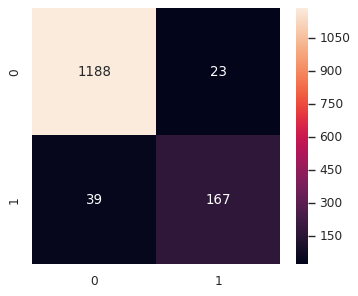

XGBoost Classifier :

	 The Training model accuracy :1.0
	 The Test model accuracy: 0.9562455892731122

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1211
           1       0.88      0.81      0.84       206

    accuracy                           0.96      1417
   macro avg       0.92      0.90      0.91      1417
weighted avg       0.96      0.96      0.96      1417



In [20]:
xgb = XGBClassifier(learning_rate=0.1, n_estimators=700, max_depth=13,
                        min_child_weight=3, gamma=0.3, subsample=0.6, colsample_bytree=1.0,
                        objective='binary:logistic', nthread=4, scale_pos_weight=1, random_state=42)
xgb.fit(x_train, y_train, eval_metric='auc')
yhat4 = xgb.predict(x_test)

plt.figure(figsize=(5, 4))
cf_mat = confusion_matrix(y_test, yhat4)
sns.heatmap(cf_mat, annot=True, fmt='g')
plt.show()


print('XGBoost Classifier :\n\n\t', f'The Training model accuracy :{xgb.score(x_train, y_train)}\n\t',
     f'The Test model accuracy: {xgb.score(x_test, y_test)}\n')
print(classification_report(y_test, yhat4))

## AdaBoostClassifier

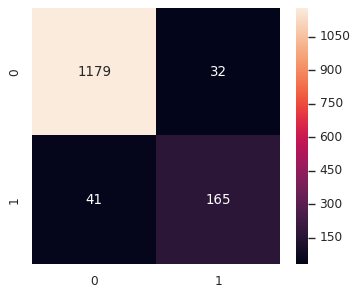

AdaBoost Classifier :

	 The Training model accuracy :0.9659251412429378
	 The Test model accuracy: 0.9484827099505999

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1211
           1       0.84      0.80      0.82       206

    accuracy                           0.95      1417
   macro avg       0.90      0.89      0.89      1417
weighted avg       0.95      0.95      0.95      1417



In [21]:
abc = AdaBoostClassifier(n_estimators=500, random_state=42)
abc.fit(x_train, y_train)
yhat5 = abc.predict(x_test)

plt.figure(figsize=(5, 4))
cf_mat = confusion_matrix(y_test, yhat5)
sns.heatmap(cf_mat, annot=True, fmt='g')
plt.show()


print('AdaBoost Classifier :\n\n\t', f'The Training model accuracy :{abc.score(x_train, y_train)}\n\t',
     f'The Test model accuracy: {abc.score(x_test, y_test)}\n')
print(classification_report(y_test, yhat5))

### KNeighbors Classifier

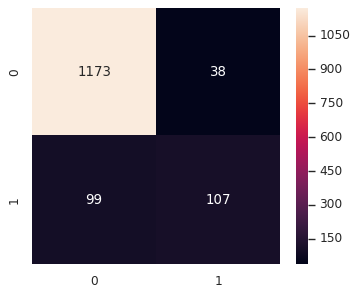

KNeighbors Classifier :

	 The Training model accuracy :0.8995409604519774
	 The Test model accuracy: 0.903316866619619

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1211
           1       0.74      0.52      0.61       206

    accuracy                           0.90      1417
   macro avg       0.83      0.74      0.78      1417
weighted avg       0.90      0.90      0.90      1417



In [22]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
yhat6 = knn.predict(x_test)

plt.figure(figsize=(5, 4))
cf_mat = confusion_matrix(y_test, yhat6)
sns.heatmap(cf_mat, annot=True, fmt='g')
plt.show()


print('KNeighbors Classifier :\n\n\t', f'The Training model accuracy :{knn.score(x_train, y_train)}\n\t',
     f'The Test model accuracy: {knn.score(x_test, y_test)}\n')
print(classification_report(y_test, yhat6))

### Gradient Boosting Classifier

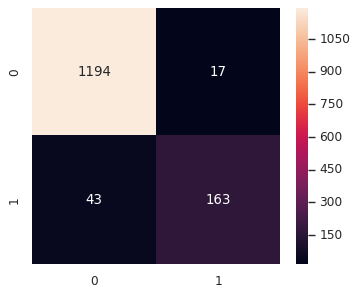

Gradient Boosting Classifier :

	 The Training model accuracy :0.964159604519774
	 The Test model accuracy: 0.9576570218772054

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1211
           1       0.91      0.79      0.84       206

    accuracy                           0.96      1417
   macro avg       0.94      0.89      0.91      1417
weighted avg       0.96      0.96      0.96      1417



In [23]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
yhat7 = gbc.predict(x_test)

plt.figure(figsize=(5, 4))
cf_mat = confusion_matrix(y_test, yhat7)
sns.heatmap(cf_mat, annot=True, fmt='g')
plt.show()


print('Gradient Boosting Classifier :\n\n\t', f'The Training model accuracy :{gbc.score(x_train, y_train)}\n\t',
     f'The Test model accuracy: {gbc.score(x_test, y_test)}\n')
print(classification_report(y_test, yhat7))